Cristel Irwin

Part 1 = 70.8% Accuracy

Target: admit

Program a multi-dimensional logistic regression model, predicting the probability that the student was admitted.

What is your model's accuracy? (the fraction of the correct predictions to the total cases).


In [31]:
!pip install --user scikit-learn

In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from scipy.special import softmax
from scipy import stats
onehot_encoder = OneHotEncoder(sparse=False)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [56]:
df=pd.read_csv("C:/Users/Sandy\Desktop/Intro to Machine Learning/gradadmission.csv")

In [57]:
df['gpa'] = df['gpa'].astype(float)
df['admit'] = df['admit'].astype(float)
df['gre'] = df['gre'].astype(float)
df['rank'] = df['rank'].astype(float)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   admit   400 non-null    float64
 1   gre     400 non-null    float64
 2   gpa     400 non-null    float64
 3   rank    400 non-null    float64
dtypes: float64(4)
memory usage: 12.6 KB


In [59]:
df.head()

,admit,gre,gpa,rank
0,0.0,380.0,3.61,3.0
1,1.0,660.0,3.67,3.0
2,1.0,800.0,4.00,1.0
3,1.0,640.0,3.19,4.0
4,0.0,520.0,2.93,4.0


In [60]:
df['y'] = df['admit']
df

,admit,gre,gpa,rank,y
0,0.0,380.0,3.61,3.0,0.0
1,1.0,660.0,3.67,3.0,1.0
2,1.0,800.0,4.00,1.0,1.0
3,1.0,640.0,3.19,4.0,1.0
4,0.0,520.0,2.93,4.0,0.0
...,...,...,...,...,...
395,0.0,620.0,4.00,2.0,0.0
396,0.0,560.0,3.04,3.0,0.0
397,0.0,460.0,2.63,2.0,0.0
398,0.0,700.0,3.65,2.0,0.0


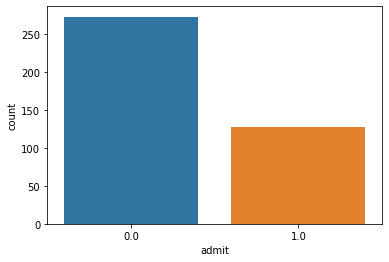

In [38]:
df_train=df
ax = sns.countplot(x='admit', data=df)
plt.show()

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[['gpa','gre','rank']], df['y'], test_size=0.3, random_state=11)

In [40]:
X_train

,gpa,gre,rank
105,2.97,740.0,2.0
228,3.43,480.0,2.0
173,3.43,800.0,2.0
226,3.58,620.0,2.0
205,3.80,780.0,3.0
...,...,...,...
269,2.81,500.0,3.0
337,3.09,620.0,4.0
91,3.64,720.0,1.0
80,2.90,700.0,4.0


In [41]:
y_train

105    1.0
228    0.0
173    1.0
226    0.0
205    1.0
      ... 
269    0.0
337    0.0
91     1.0
80     0.0
191    0.0
Name: y, Length: 280, dtype: float64

In [42]:
y_train.sum()/7000

0.012285714285714285

In [43]:
fitmodel.params

const   -4.343355
gpa      0.954124
gre      0.002256
rank    -0.459604
dtype: float64

In [87]:
X1_train = sm.add_constant(X_train['gpa'])

logit = sm.Logit(y_train, X1_train)
fit_results_1dstu = logit.fit()
fit_results_1dstu.summary()

Optimization terminated successfully.
         Current function value: 0.595782
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  280
Model:                          Logit   Df Residuals:                      278
Method:                           MLE   Df Model:                            1
Date:                Mon, 06 Dec 2021   Pseudo R-squ.:                 0.03407
Time:                        12:13:18   Log-Likelihood:                -166.82
converged:                       True   LL-Null:                       -172.70
Covariance Type:            nonrobust   LLR p-value:                 0.0006028
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.0419      1.290     -3.907      0.000      -7.571      -2.513
gpa            1.2279      0.369      3.325      0.001       0.504       1.952
==============================================================================
"""

In [88]:
import statsmodels.api as sm

X1_train = sm.add_constant(X_train)

logit = sm.Logit(y_train, X1_train)
fitmodel = logit.fit()
fitmodel.summary()

Optimization terminated successfully.
         Current function value: 0.570314
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  280
Model:                          Logit   Df Residuals:                      276
Method:                           MLE   Df Model:                            3
Date:                Mon, 06 Dec 2021   Pseudo R-squ.:                 0.07536
Time:                        12:13:19   Log-Likelihood:                -159.69
converged:                       True   LL-Null:                       -172.70
Covariance Type:            nonrobust   LLR p-value:                 9.403e-06
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.3434      1.414     -3.071      0.002      -7.115      -1.572
gpa            0.9541      0.400      2.386      0.017       0.170       1.738
gre            0.0023      0.001      1.708      0.088      -0.000       0.005
rank          -0.4596      0.149     -3.083      0.002      -0.752      -0.167
==============================================================================
"""

In [89]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [90]:
w0 = fitmodel.params['rank']
w1 = fitmodel.params['gpa']
w2 = fitmodel.params['gre']

In [91]:
w0_1dstu = fit_results_1dstu.params[0]
w1_1dstu = fit_results_1dstu.params[1]

In [92]:
p1d_stuY = sigmoid(w0_1dstu + w1_1dstu*(1))
p1d_stuN = sigmoid(w0_1dstu + w1_1dstu*(0))

<IPython.core.display.Javascript object>


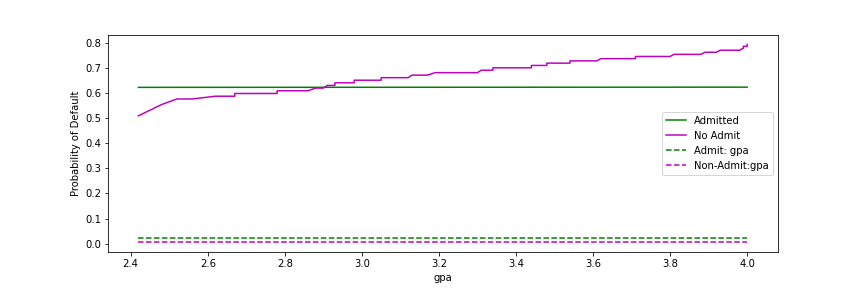

In [95]:
%matplotlib notebook

plt.figure(figsize=(12,4))

wx_stu1 = w0 + w1*np.ones_like(X_train['gpa']) + w2*X_train['gpa']
wx_stu0 = w0 + w2*X_train['gre']

plt.plot(X_train['gpa'].sort_values(), sigmoid(wx_stu1).sort_values(), 'g-', label='Admitted')
plt.plot(X_train['gpa'].sort_values(), sigmoid(wx_stu0).sort_values(), 'm-', label='No Admit')

plt.plot(X_train['gpa'].sort_values(), p1d_stuY*np.ones_like(X_train['gpa']), '--g', label='Admit: gpa')
plt.plot(X_train['gpa'].sort_values(), p1d_stuN*np.ones_like(X_train['gpa']), '--m', label='Non-Admit:gpa')

plt.ylabel('Probability of Default')
plt.xlabel('gpa');

plt.legend()
plt.xlabel('gpa');

In [96]:
logreg = LogisticRegression()

In [97]:
logreg.fit(X_train,y_train)

LogisticRegression()

In [98]:
y_pred=logreg.predict(X_test)

In [99]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[77,  2],
       [33,  8]], dtype=int64)

Accuracy, Precision, Recall

Accuracy= 70.8% 

In [100]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7083333333333334
Precision: 0.8
Recall: 0.1951219512195122


<IPython.core.display.Javascript object>


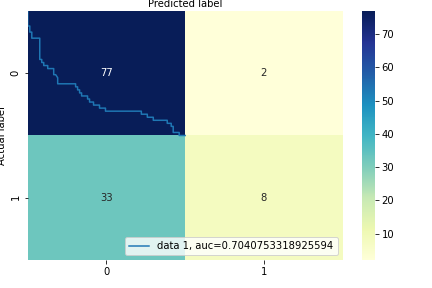

Text(0.5, 257.44, 'Predicted label')

In [101]:
class_names=[0,1]  
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [102]:
X_train

,gpa,gre,rank
105,2.97,740.0,2.0
228,3.43,480.0,2.0
173,3.43,800.0,2.0
226,3.58,620.0,2.0
205,3.80,780.0,3.0
...,...,...,...
269,2.81,500.0,3.0
337,3.09,620.0,4.0
91,3.64,720.0,1.0
80,2.90,700.0,4.0


In [103]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [104]:
fit_results_1dstu = logit.fit()
fit_results_1dstu.summary()

w0 = fitmodel.params['const']
w1 = fitmodel.params['gre']
w2 = fitmodel.params['gpa']

w0_1dstu = fit_results_1dstu.params[0]
w1_1dstu = fit_results_1dstu.params[1]

p1d_stuY = sigmoid(w0_1dstu + w1_1dstu*(1))
p1d_stuN = sigmoid(w0_1dstu + w1_1dstu*(0))

Optimization terminated successfully.
         Current function value: 0.570314
         Iterations 6


<IPython.core.display.Javascript object>


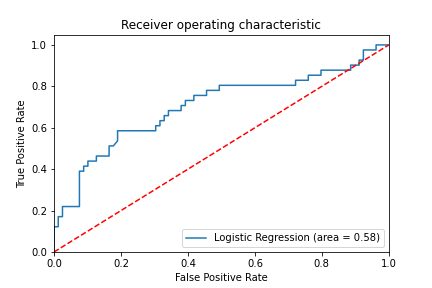

In [105]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

<IPython.core.display.Javascript object>


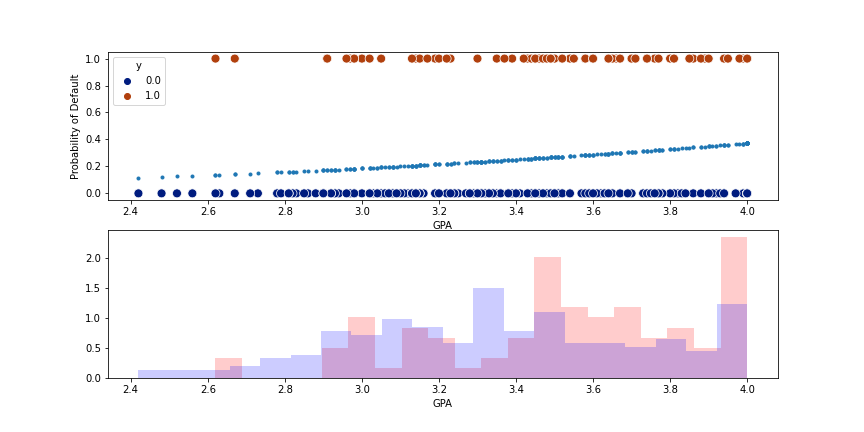

In [106]:
w0 = fitmodel.params[0]
w1 = fitmodel.params[1]
plt.figure(figsize=(12,6))

wx = w0 + w1*X_train['gpa']

plt.subplot(2,1,1)
sns.scatterplot(data=X_train, x='gpa', y=y_train, s=80, palette='dark', hue=y_train)
plt.plot(X_train['gpa'], sigmoid(wx), '.')
plt.ylabel('Probability of Default')
plt.xlabel('GPA');

plt.subplot(2,1,2)
plt.hist(X_train[y_train==1]['gpa'].values, color='r', bins=20, alpha=0.2, density=True)
plt.hist(X_train[y_train==0]['gpa'].values, color='b', bins=20, alpha=0.2, density=True)

plt.xlabel('GPA');

Part 2  = 41.25% Accuracy

Target: rank

Program a multi-class logistic regression model (also multi-dimensional) to predict the rank of the applicant's undergraduate school.

What is your model's accuracy?

In [111]:
df2=df

In [112]:
df2['y2'] = df2['rank']

In [113]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(df[['gpa','gre','admit']], df2['y2'], test_size=0.3, random_state=11)

In [114]:
X_train2

,gpa,gre,admit
105,2.97,740.0,1.0
228,3.43,480.0,0.0
173,3.43,800.0,1.0
226,3.58,620.0,0.0
205,3.80,780.0,1.0
...,...,...,...
269,2.81,500.0,0.0
337,3.09,620.0,0.0
91,3.64,720.0,1.0
80,2.90,700.0,0.0


In [115]:
y_train2

105    2.0
228    2.0
173    2.0
226    2.0
205    3.0
      ... 
269    3.0
337    4.0
91     1.0
80     4.0
191    3.0
Name: y2, Length: 280, dtype: float64

In [116]:
y_train2.sum()/7000

0.09985714285714285

In [117]:
logreg = LogisticRegression()
logreg.fit(X_train2, y_train2)

LogisticRegression()

Accuracy

In [130]:
y_pred2=logreg.predict(X_test2)

In [131]:
cnf_matrix2 = metrics.confusion_matrix(y_test2, y_pred2)
cnf_matrix2

array([[ 0,  9,  1,  0],
       [ 0, 24,  7,  0],
       [ 0, 13,  9,  0],
       [ 0, 16,  1,  0]], dtype=int64)

Accuracy: 41.25%

In [132]:
accuracy = logreg.score(X_test2, y_test2)
print('The accuracy is: ' + str(accuracy *100) + '%')

The accuracy is: 41.25%


<IPython.core.display.Javascript object>


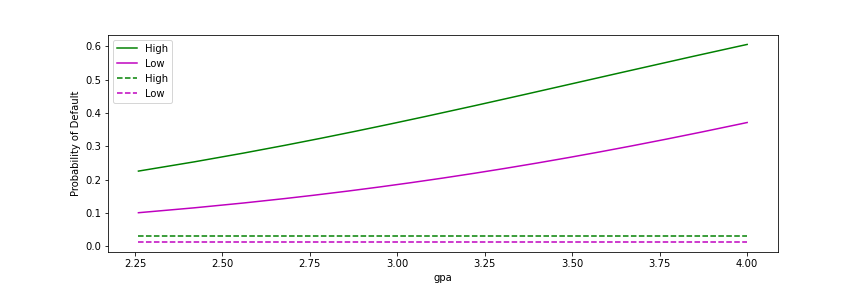

In [128]:
%matplotlib notebook

plt.figure(figsize=(12,4))

wx_stu1 = w0 + w1*np.ones_like(X_train2['gre']) + w2*X_train2['gpa']
wx_stu0 = w0 + w2*X_train2['gpa']

plt.plot(X_train2['gpa'].sort_values(), sigmoid(wx_stu1).sort_values(), 'g-', label='High')
plt.plot(X_train2['gpa'].sort_values(), sigmoid(wx_stu0).sort_values(), 'm-', label='Low')

plt.plot(X_train2['gpa'].sort_values(), p1d_stuY*np.ones_like(X_train2['gpa']), '--g', label='High')
plt.plot(X_train2['gpa'].sort_values(), p1d_stuN*np.ones_like(X_train2['gpa']), '--m', label='Low')

plt.ylabel('Probability of Default')
plt.xlabel('gpa');

plt.legend()
plt.xlabel('gpa');

In [120]:
import pandas as pd 
import numpy as np 
import scipy as scp
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics 
from sklearn.metrics import confusion_matrix


In [121]:
df_2=df[['gpa','gre','admit']]

In [122]:
X_train2, X_test2, y_train2, y_test2 = sklearn.model_selection.train_test_split(df_2, df2['y2'], test_size = 0.20, random_state = 5)

In [123]:
model1 = LogisticRegression(random_state=0, multi_class='multinomial', penalty='none', solver='newton-cg').fit(X_train2, y_train2)
preds = model1.predict(X_test2)

In [124]:
params = model1.get_params()
print(params)

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'multinomial', 'n_jobs': None, 'penalty': 'none', 'random_state': 0, 'solver': 'newton-cg', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [125]:
logit_model2=sm.MNLogit(y_train2,sm.add_constant(X_train2))
logit_model2
result2=logit_model2.fit()
stats1=result2.summary()
stats2=result2.summary2()
print(stats1)
print(stats2)

Optimization terminated successfully.
         Current function value: 1.259297
         Iterations 6
                          MNLogit Regression Results                          
Dep. Variable:                     y2   No. Observations:                  320
Model:                        MNLogit   Df Residuals:                      308
Method:                           MLE   Df Model:                            9
Date:                Mon, 06 Dec 2021   Pseudo R-squ.:                 0.04127
Time:                        12:16:36   Log-Likelihood:                -402.97
converged:                       True   LL-Null:                       -420.32
Covariance Type:            nonrobust   LLR p-value:                 6.743e-05
      y2=2       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2596      1.634      2.607      0.009       1.057       7.463
gpa           -0.9880      0.

<IPython.core.display.Javascript object>


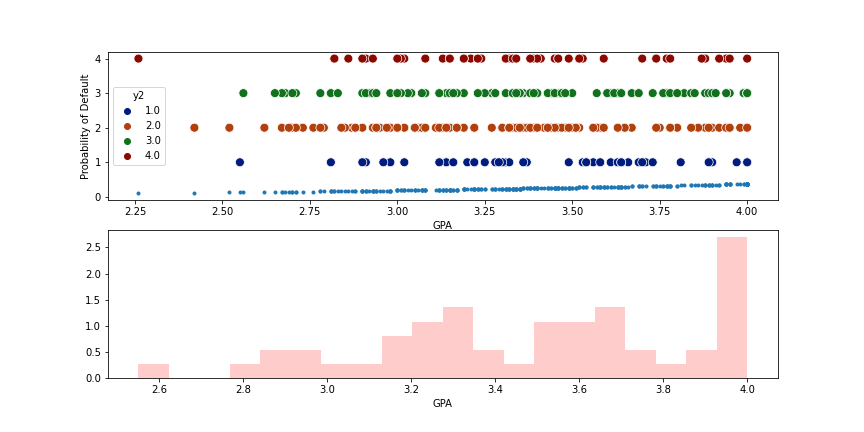

C:\Users\Sandy\anaconda3\lib\site-packages\numpy\lib\histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


In [126]:
w0 = fitmodel.params[0]
w1 = fitmodel.params[1]
plt.figure(figsize=(12,6))

wx = w0 + w1*X_train2['gpa']

plt.subplot(2,1,1)
sns.scatterplot(data=X_train2, x='gpa', y=y_train2, s=80, palette='dark', hue=y_train2)
plt.plot(X_train2['gpa'], sigmoid(wx), '.')
plt.ylabel('Probability of Default')
plt.xlabel('GPA');

plt.subplot(2,1,2)
plt.hist(X_train2[y_train2==1]['gpa'].values, color='r', bins=20, alpha=0.2, density=True)
plt.hist(X_train2[y_train2==0]['gpa'].values, color='b', bins=20, alpha=0.2, density=True)

plt.xlabel('GPA');

<IPython.core.display.Javascript object>


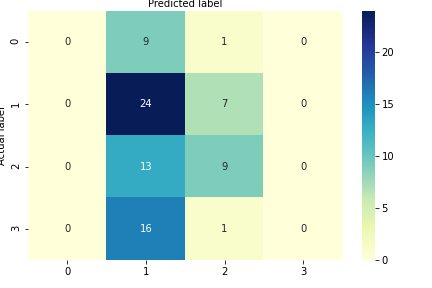

Text(0.5, 257.44, 'Predicted label')

In [137]:
class_names=[0,1]  
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix2), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')